第6章: 機械学習
50. データの入手・整形
51. 特徴量抽出
52. 学習
53. 予測
54. 正解率の計測
55. 混同行列の作成
56. 適合率，再現率，F1スコアの計測
57. 特徴量の重みの確認
58. 正則化パラメータの変更
59. ハイパーパラメータの探索<br>

本章では，Fabio Gasparetti氏が公開している[News Aggregator Data Set](https://archive.ics.uci.edu/ml/datasets/News+Aggregator)を用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

# 50: データの入手・整形

[News Aggregator Data Set](https://archive.ics.uci.edu/static/public/359/news+aggregator.zip)をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [ ]:
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = Path("/content/drive/MyDrive/Colab Notebooks/data")
file_url = "https://archive.ics.uci.edu/static/public/359/news+aggregator.zip"

!gdown $file_url -O "/content/drive/MyDrive/Colab Notebooks/data/news+aggregator.zip"

Downloading...
From: https://archive.ics.uci.edu/static/public/359/news+aggregator.zip
To: /content/drive/MyDrive/Colab Notebooks/data/news+aggregator.zip
29.2MB [00:09, 3.14MB/s]


In [ ]:
prj_dir = data_dir / "news+aggregator"
prj_dir.mkdir(exist_ok=True)

with zipfile.ZipFile(data_dir / "news+aggregator.zip", "r") as zip_ref:
    zip_ref.extractall(prj_dir)
print(f"解凍完了: {prj_dir}")

解凍完了: /content/drive/MyDrive/Colab Notebooks/data/news+aggregator


In [ ]:
columns = ['ID', 'Title', 'URL', 'Publisher', 'Category', 'Story', 'Hostname', 'Timestamp']

# ヘッダーなしで読み込んで列を付与
newsCorpora = pd.read_csv(
    prj_dir / "newsCorpora.csv",
    sep='\t',  # データがタブ区切りの可能性がある
    header=None,
    names=columns
)

newsCorpora.head(5)

,ID,Title,URL,Publisher,Category,Story,Hostname,Timestamp
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
twoPageSessions = pd.read_csv(
    prj_dir / "2pageSessions.csv",
    sep = '\t',
    header = None,
    names = ['STORY', 'HOSTNAME', 'CATEGORY', 'URL']
    )

twoPageSessions.head()

,STORY,HOSTNAME,CATEGORY,URL
0,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,techcrunch.com,b,http://techcrunch.com/ http://techcrunch.com/2...
1,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,techcrunch.com,b,http://techcrunch.com/ecommerce/ http://techcr...
2,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,www.bnn.ca,b,http://www.bnn.ca/News/2014/ http://www.bnn.ca...
3,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,www.bnn.ca,b,http://www.bnn.ca/news http://www.bnn.ca/News/...
4,dxyGGb4iN9Cs9aMZTKQpJeoiQfruM,www.bnn.ca,b,http://www.bnn.ca/News/News-Listing.aspx?Secto...


In [ ]:
target_publishers= ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
filtered_news = newsCorpora[newsCorpora['Publisher'].isin(target_publishers)]

filtered_news.head(5)

,ID,Title,URL,Publisher,Category,Story,Hostname,Timestamp
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [ ]:
# filtered_news を使用: ランダムに並び替える
filtered_news = filtered_news.sample(frac=1).reset_index(drop=True)
# 'frac=1' shuffles all rows.
# 'reset_index(drop=True)' resets the index after shuffling.

from sklearn.model_selection import train_test_split

train, temp = train_test_split(filtered_news, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

train.to_csv(prj_dir / 'train.txt', sep='\t', index=False, header=True)
val.to_csv(prj_dir / 'valid.txt', sep='\t', index=False, header=True)
test.to_csv(prj_dir / 'test.txt', sep='\t', index=False, header=True)

# 51: 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

train = pd.read_csv(prj_dir / 'train.txt', sep='\t')
test = pd.read_csv(prj_dir / 'test.txt', sep='\t')
val = pd.read_csv(prj_dir / 'valid.txt', sep='\t')
print(train.head(3))
# print(test.head())
# print(val.head()
# TfidfVectorizer を初期化
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train = vectorizer.fit_transform(train['Title'] + ' ' + train['Publisher'])
X_test = vectorizer.transform(test['Title'] + ' ' + test['Publisher'] )
X_val = vectorizer.transform(val['Title'] + ' ' + val['Publisher'])

print(f"{X_train[0]}")

"""
TF-IDF で文章をベクトル化すると、各単語に対応する要素が「非ゼロ」となり、それ以外は「0」になります。
データが大きくなると、0が大半を占めるため、メモリ効率を考えて非ゼロ要素のみを記録する形式（スパース行列）が使われます。
  (0, 365)	0.4383384859675136 # 0番目の文書の365番目の特徴量(TF-IDFスコア)が0.4383384859675136
  (0, 685)	0.4965562281508316
  (0, 621)	0.2409467116815862
  (0, 710)	0.5338684936502064
  (0, 771)	0.46714066149481925
"""


       ID                                              Title  \
0  123059  Lindsay Lohan's Show Slammed By Rosie O'Donnel...   
1  300194  Style Jeanius: Pregnant Kourtney Kardashian co...   
2  109189  Gwyneth Paltrow - Gwyneth Paltrow And Chris Ma...   

                                                 URL         Publisher  \
0  http://www.contactmusic.com/article/rose-o-don...  Contactmusic.com   
1  http://www.dailymail.co.uk/tvshowbiz/article-2...        Daily Mail   
2  http://www.contactmusic.com/story/gwyneth-palt...  Contactmusic.com   

  Category                          Story              Hostname      Timestamp  
0        e  dao4gZJ_Q7oI7OM_cTZbhwBUa9phM  www.contactmusic.com  1397651797480  
1        e  d1OQntkaQsX4EPMRA2lo6Z85lOhAM   www.dailymail.co.uk  1403088192568  
2        e  d1lCBlybARho3nMXdYowFy6RqxvgM  www.contactmusic.com  1397407046432  
  (0, 521)	0.52357983709191
  (0, 528)	0.5221187731610625
  (0, 743)	0.5895231449063365
  (0, 192)	0.23051414297464573
  (

'\nTF-IDF で文章をベクトル化すると、各単語に対応する要素が「非ゼロ」となり、それ以外は「0」になります。\nデータが大きくなると、0が大半を占めるため、メモリ効率を考えて非ゼロ要素のみを記録する形式（スパース行列）が使われます。\n  (0, 365)\t0.4383384859675136 # 0番目の文書の365番目の特徴量(TF-IDFスコア)が0.4383384859675136\n  (0, 685)\t0.4965562281508316\n  (0, 621)\t0.2409467116815862\n  (0, 710)\t0.5338684936502064\n  (0, 771)\t0.46714066149481925\n'

# 52: 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = train['Category']
y_test = test['Category']
y_val = val['Category']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 53: 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ

In [ ]:
def predict(title):
    pred = model.predict(title)
    pred_proba = model.predict_proba(title)
    return pred[0], pred_proba.max()

tmp_vec = vectorizer.fit_transform(train['Title'])[0]
cat, proba = predict(tmp_vec)
print(f"{cat}, {proba}")

t, 0.3912447786466181


# 54, 55, 56. 正解率の計測, 混合行列の作成、適合率、再現率、F1スコアの計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ<br>
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．<br>
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ<br>

train Accuracy: 0.8985194902548725
Test Accuracy: 0.8590704647676162
Training Data Confusion Matrix
Test Data Confusion Matrix


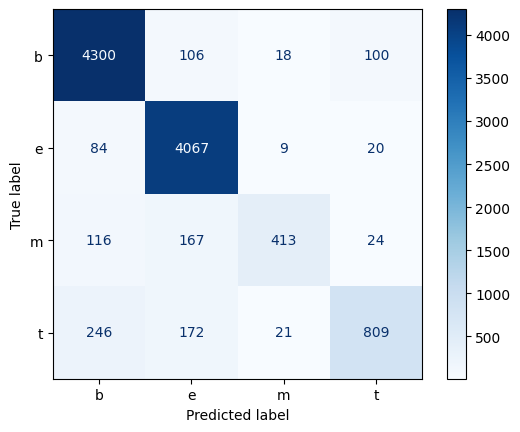

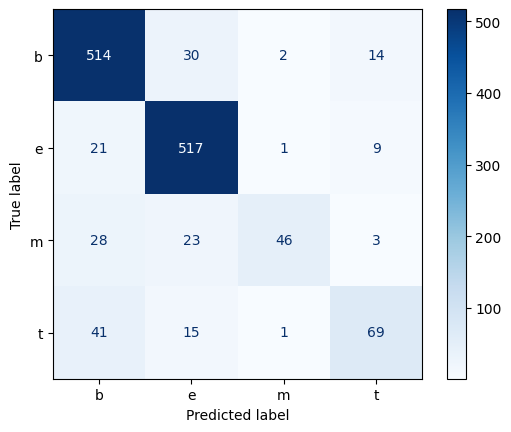

Training Data Classification Report
              precision    recall  f1-score   support

           b       0.91      0.95      0.93      4524
           e       0.90      0.97      0.94      4180
           m       0.90      0.57      0.70       720
           t       0.85      0.65      0.74      1248

    accuracy                           0.90     10672
   macro avg       0.89      0.79      0.82     10672
weighted avg       0.90      0.90      0.89     10672

Test Data Classification Report
              precision    recall  f1-score   support

           b       0.85      0.92      0.88       560
           e       0.88      0.94      0.91       548
           m       0.92      0.46      0.61       100
           t       0.73      0.55      0.62       126

    accuracy                           0.86      1334
   macro avg       0.85      0.72      0.76      1334
weighted avg       0.86      0.86      0.85      1334

              precision    recall  f1-score   support

       

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)


disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=model.classes_)

print("Training Data Confusion Matrix")
disp_train.plot(cmap="Blues")
print("Test Data Confusion Matrix")
disp_test.plot(cmap='Blues')
plt.show()

print("Training Data Classification Report")
print(classification_report(y_train, y_pred_train))
print("Test Data Classification Report")
print(classification_report(y_test, y_pred_test))


# 4. 評価データで適合率、再現率、F1スコアを計測
report = classification_report(y_test, y_pred_test, output_dict=True)
print(classification_report(y_test, y_pred_test))  # カテゴリごとのスコアを表示

# 5. マイクロ平均とマクロ平均の計算
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    y_test, y_pred_test, average='micro'
)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    y_test, y_pred_test, average='macro'
)

# 6. 出力
print("\nマイクロ平均:")
print(f"Precision: {micro_precision:.2f}, Recall: {micro_recall:.2f}, F1-score: {micro_f1:.2f}")

print("\nマクロ平均:")
print(f"Precision: {macro_precision:.2f}, Recall: {macro_recall:.2f}, F1-score: {macro_f1:.2f}")

# 57
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
# print(feature_names)
coefs = model.coef_
# print(f"{coefs.shape=}")


# 5. 各クラスごとのトップ10とワースト10を表示
for i, category in enumerate(model.classes_):
    print(f"\nクラス: {category}")

    # クラスごとの重みを取得
    class_coefs = coefs[i]

    # トップ10
    top10_idx = np.argsort(class_coefs)[-10:][::-1]  # 重みが高い順に並び替え
    print("重みが高い特徴量トップ10:")
    print((list(zip(feature_names[top10_idx], np.round(class_coefs[top10_idx], 3)))))

    # ワースト10
    worst10_idx = np.argsort(class_coefs)[:10]  # 重みが低い順に並び替え
    print("重みが低い特徴量トップ10:")
    print(list(zip(feature_names[worst10_idx], np.round(class_coefs[worst10_idx], 3))))


#   •	b: ビジネス (business)
# 	•	t: テクノロジー (technology)
# 	•	e: エンターテイメント (entertainment)
# 	•	m: 健康・医療 (medical)



クラス: b
重みが高い特徴量トップ10:
[('batman', 2.911), ('stones', 2.818), ('unit', 2.464), ('fiat', 2.433), ('edge', 2.401), ('official', 2.394), ('cigarette', 2.326), ('ex', 2.299), ('opening', 2.296), ('dow', 2.014)]
重みが低い特徴量トップ10:
[('cost', -3.952), ('comes', -2.612), ('date', -2.526), ('makes', -2.258), ('economy', -2.052), ('africa', -2.016), ('view', -1.812), ('early', -1.796), ('million', -1.77), ('idol', -1.725)]

クラス: e
重みが高い特徴量トップ10:
[('cost', 4.936), ('comes', 4.056), ('kendall', 2.606), ('citigroup', 2.376), ('tops', 2.263), ('direct', 2.124), ('finale', 2.092), ('miranda', 2.024), ('data', 2.019), ('michelle', 1.964)]
重みが低い特徴量トップ10:
[('richard', -3.996), ('canada', -3.988), ('grains', -2.403), ('second', -2.006), ('sues', -1.931), ('rolf', -1.868), ('cigarette', -1.809), ('david', -1.728), ('canadian', -1.711), ('robin', -1.651)]

クラス: m
重みが高い特徴量トップ10:
[('economy', 4.608), ('federal', 3.854), ('carey', 3.493), ('sues', 3.349), ('michele', 3.342), ('early', 3.065), ('ceo', 2.641), ('he

# 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

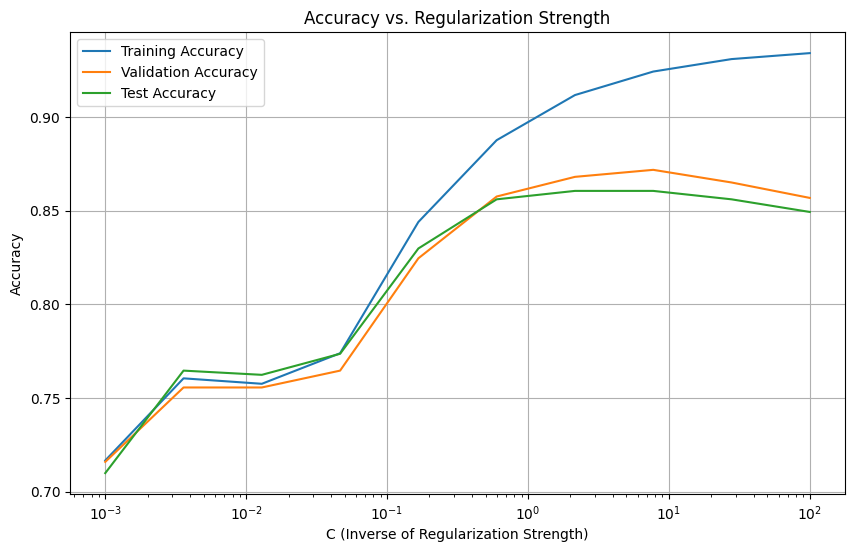

In [ ]:
import numpy as np

C_values = np.logspace(-3, 2, 10)

train_accuracies = []
val_accuracies = []
test_accuracies = []

for  C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)
    test_acc = model.score(X_test, y_test)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, val_accuracies, label='Validation Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()


59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 1. モデルとハイパーパラメータの設定
param_grid = [
    {
        'model': [LogisticRegression(max_iter=1000)],
        'model__C': np.logspace(-3, 2, 10)
    },
    {
        'model': [SVC()],
        'model__C': np.logspace(-3, 2, 10),
        'model__kernel': ['linear', 'rbf']
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20]
    }
]

# 2. TF-IDFベクトル化を含むパイプラインを構築
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000, stop_words='english')),
    ('model', LogisticRegression())
])

# 3. グリッドサーチでハイパーパラメータ探索
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train['Title'], train['Category'])

# 4. 最適なモデルとパラメータを表示
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 5. 評価データでの精度を確認
test_accuracy = accuracy_score(y_test, best_model.predict(test['Title']))
print("Test Accuracy with Best Model:", test_accuracy)

Best Parameters: {'model': SVC(), 'model__C': 2.1544346900318843, 'model__kernel': 'rbf'}
Test Accuracy with Best Model: 0.8740629685157422


In [ ]:
import joblib
joblib.dump(best_model, prj_dir / 'best_svm_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/data/news+aggregator/best_svm_model.pkl']